# Distribuições amostrais

## Definição

Considere uma população com determinado parâmetro de interesse $\theta$. Considere também a realização de uma amostragem aleatória simples de uma população para produzir uma amostra de $n$ elementos. Uma afirmação eventualmente feita sobre essa população será baseada em alguma estatística $T$, que é uma função da amostra. Colhida essa amostra, teremos observado um *valor particular* de $T$. A validade dessa afirmação seria melhor compreendida se soubéssemos o que acontece quando produzimos **todas** as amostras da população. Isto é, qual é a distribuição de $T$ quando consideramos todas as amostras possíveis.

> A distribuição obtida considerando todas as possíveis amostras de determinado tamanho de uma população (retiradas de acordo com certo plano amostral) é denominada **distribuição amostral** (*sampling distribution*) da estatística $T$.

> A distribuição amostral de uma estatística $T$ é construída computando a estatística em cada possível amostra de tamanho $n$ da população. Os valores $t$ resultantes dessa computação formam uma nova população, cuja distribuição recebe o nome de **distribuição amostral de $T$**.

Repare que a definição acima diz respeito à chamada **distribuição amostral teórica**, que considera todas as possíveis amostras de tamanho $n$ da população. Na maior parte dos casos práticos, é impossível construir a distribuição amostral teórica, porque isso demandaria mensurar todos os indivíduos da população com relação à característica de interesse. Isso sem considerar os casos em que a população de interesse é infinita, situação na qual a quantidade de amostras possíveis também seria infinita.

Na Inferência Estatística, normalmente é utilizada a **distribuição amostral empírica**, que é construída usando uma quantidade relativamente grande de amostras retiradas da população. Por consequência, uma distribuição amostral empírica deve ser entendida como uma aproximação da distribuição amostral teórica.

A figura a seguir ([fonte](https://www.amazon.com/Elementary-Statistics-Criminal-Justice-Research/dp/0205420532)) ilustra a relação entre a distribuição de uma população (canto superior esquerdo) e a distribuição amostral teórica (canto inferior direito). A partir de uma população (cuja distribuição é usualmente desconhecida em aplicações práticas), podemos coletar uma amostra de tamanho $n=200$. Com esses 200 valores, podemos construir a chamada distribuição da amostra (*sample distribution*) que é uma aproximação da distribuição da população (canto superior direito). Se coletarmos, digamos, 100 amostras da população de computarmos a estatística de interesse, os valores resultantes correspondem à distribuição amostral empírica (*observed sampling distribution* ou *empirical sampling distribution*).

<p align="center">
  <img src="https://www.researchgate.net/profile/Jack_Levin/publication/267837095/figure/fig2/AS:669384687222809@1536605154656/Population-Sample-and-Sampling-Distributions_W640.jpg" />
</p>

> **IMPORTANTE**: repare que os termos *sample distribution* e *sampling distribution*, embora semelhantes, denotam conceitos diferentes! As traduções que usamos para esses termos são *distribuição da amostra* e *distribuição amostral*, respectivamente.


## Distribuição amostral da média amostral


Considere o caso particular em que a estatística de interesse é a *média amostral* (*sample mean*), e que valores dessa estatística são computados a partir de amostras de tamanho $n$:

$$
{\overline{x}}_{n}={\frac{1}{n}}(x_{1}+x_{2}+\cdots +x_{n})
$$

A distribuição amostral de $\overline{x}_n$ é denominada **distribuição amostral da média amostral** (*sampling distribution of the sample mean*) ou simplesmente **distribuição amostral da média** (*sampling distribution of the mean*).

Por vezes, em vez de usar a notação ${\overline{x}}_{n}$, o subscrito $n$ é omitido e a média amostral é denotada simplesmente por ${\overline{x}}$.

## Simulação computacional 1

Podemos ilustrar com uma simulação computacional o conceito de distribuição amostral. 

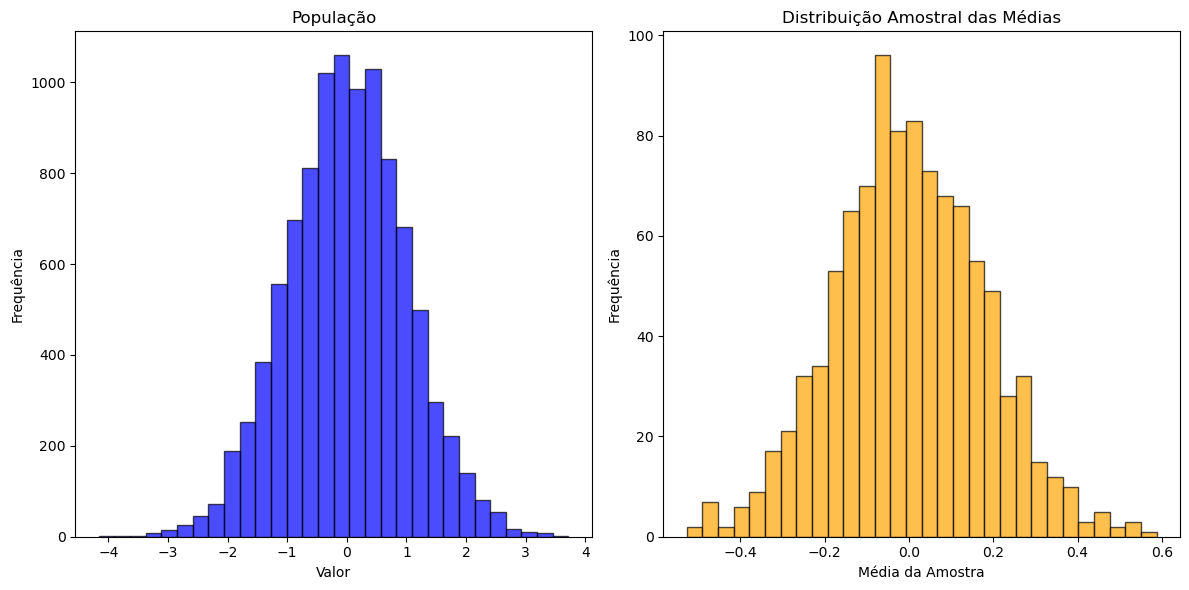

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo os parâmetros da distribuição normal
mu = 0      # média
sigma = 1   # desvio padrão
populacao_tamanho = 10000
amostra_tamanho = 30
num_amostras = 1000

# Gerando a população
populacao = np.random.normal(mu, sigma, populacao_tamanho)

# Criando a distribuição amostral
medias_amostrais = []

for _ in range(num_amostras):
    amostra = np.random.choice(populacao, size=amostra_tamanho)
    medias_amostrais.append(np.mean(amostra))

# Plotando a população
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(populacao, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('População')
plt.xlabel('Valor')
plt.ylabel('Frequência')

# Plotando a distribuição amostral
plt.subplot(1, 2, 2)
plt.hist(medias_amostrais, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribuição Amostral das Médias')
plt.xlabel('Média da Amostra')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

## Simulação computacional 2

Para essa segunda simulação, considere o experimento aleatório que envolve o lançamento de um dado de 6 lados (exemplo adaptado de https://machinelearningmastery.com/a-gentle-introduction-to-the-central-limit-theorem-for-machine-learning/). Cada resultado tem uma probabilidade de 1 em 6.

A distribuição dos números que aparecem em uma jogada de dados é uniforme, conforme ilustra o histograma na figura a seguir ([fonte](https://study.com/academy/lesson/uniform-distribution-in-statistics-definition-examples.html)). Esse histograma corresponde à **distribuição da população**.

<p align="center">
  <img src="https://study.com/cimages/multimages/16/uniform_distribution_die_v2.png" />
</p>

É possível provar (veja [aqui](https://proofwiki.org/wiki/Expectation_of_Discrete_Uniform_Distribution) e [aqui](https://proofwiki.org/wiki/Variance_of_Discrete_Uniform_Distribution)) que, para uma variável aleatória discreta $X$ que segue uma distribuição uniforme e que pode assumir valores de $a=1$ até $b=6$, sua média é

$$
\mu = \operatorname{E}[X] = \frac{(a+b)}{2} = 3.5
$$

e sua variância é
$$
\sigma^2 = \operatorname{Var}[X] = \frac{(b-a+1)^{2}-1}{12} \approx 2.9166...
$$

Os valores de $\mu$ e de $\sigma^2$ acima são os parâmetros populacionais. Nesse experimento, conhecemos esses valores porque estamos lidando com uma distribuição teórica. Todavia, em uma situação real, esse valores (dos parâmetros populacionais) raramente são conhecidos.



Podemos usar a função [randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) do NumPy para simular um número específico de *observações*, i.e., de lançamentos do dado. Por exemplo, podemos gerar uma amostra de 50 observações, conforme ilustrado na célula de código abaixo.

In [5]:
from numpy.random import randint
from numpy.random import seed
import numpy as np

seed(1)

n = 5

#seed(42)

# gera uma amostra de 50 lançamentos do dado
rolls = randint(1, 7, n)

labels, counts = np.unique(rolls, return_counts=True)

print(rolls)
print(labels)
print(counts)

[6 4 5 1 2]
[1 2 4 5 6]
[1 1 1 1 1]


Agora, em vez de apenas $50$, vamos gerar uma amostra de $10000$ observações. Em seguida, vamos construir a distribuição dessa amostra. O histograma gerado a seguir é a **distribuição da amostra**. Repare que, conforme esperado, a distribução da amostra é semelhante à distribuição da população.

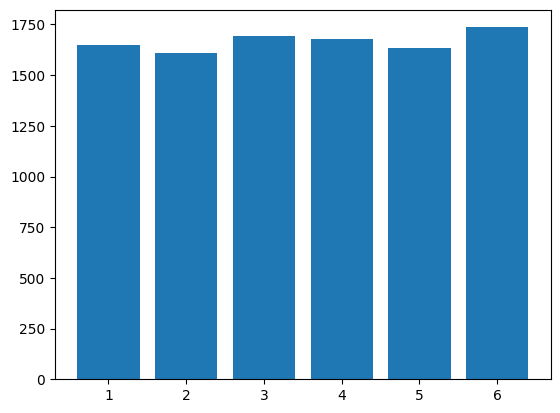

In [6]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean, std
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

# seed the random number generator
seed(1)

sample = randint(1, 7, 10000)

labels, counts = np.unique(sample, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()

Agora, para uma quantidade específica $n$ de lançamentos, podemos computar a média dos valores resultantes. O código a seguir exemplifica isso para $n=50$.

In [7]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean

rolls = randint(1, 7, 50)
print("Observações da amostra:\n", rolls)
print("Média das observações:\n", mean(rolls))

Observações da amostra:
 [6 3 3 2 1 1 2 6 6 4 3 3 3 4 6 6 2 4 2 1 2 4 6 2 6 1 2 2 4 1 1 1 1 2 3 4 4
 4 1 5 5 4 1 6 5 1 5 6 2 4]
Média das observações:
 3.26


In [8]:
l = [1,2,46,7,8,9]
[x**2 for x in l]

[1, 4, 2116, 49, 64, 81]

O valor produzido acima é um dos valores que a estatística $\overline{x}$ pode assumir. De fato, podemos produzir múltiplos valores $\overline{x}$ e desenhar o histograma correspondente à **distribuição amostral empírica** de $\overline{x}$, conforme o código abaixo.

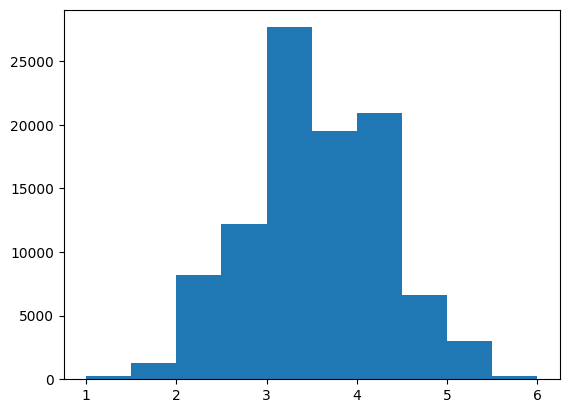

In [9]:
from numpy.random import seed
from numpy.random import randint
from numpy import mean, std
import numpy as np
from matplotlib import pyplot

# seed the random number generator
seed(1)

n = 5
num_amostras = 100000

# list comprehension
means = [mean(randint(1, 7, n)) for _ in range(num_amostras)]

pyplot.hist(means)
pyplot.show()

# Referências

- [Making Sense of Sampling Distributions](https://python.plainenglish.io/making-sense-of-sampling-distributions-39598b575fbe). Leia esse artigo para consolidar seu conhecimento sobre o conceito de distribuições amostrais.